In [1]:
import json as json
import itertools
import re
import collections
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
G = nx.read_gexf("hashtags.gexf")

In [3]:
weights = [d['weight'] for (u, v, d) in G.edges(data=True)]

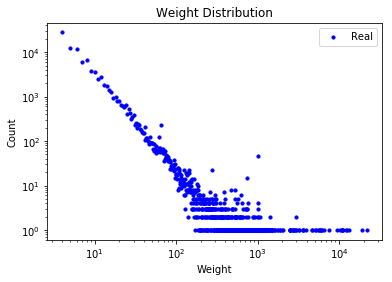

In [4]:
weights = sorted([d['weight'] for (u, v, d) in G.edges(data=True)], reverse=True)
weightCount = collections.Counter(weights)
wgt, cnt = zip(*weightCount.items())
fig, ax = plt.subplots()
ax.scatter(wgt, cnt, s=10, c='b', marker="o", label='Real')
plt.legend(loc='upper right')
plt.title("Weight Distribution")
plt.ylabel("Count")
plt.xlabel("Weight")
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.show()

In [5]:
def computeNodesStrength(G):
    weightsDict = {}
    for (u, v, d) in G.edges(data=True):
        weightsDict[(u, v)] = d['weight']
        weightsDict[(v, u)] = d['weight']
    strength = {}
    for n, d in G.degree():
        strength[n] = sum([weightsDict[(u, v)] for (u, v) in nx.edges(G, n)])
    return strength

In [34]:
strength['teamserbia']

322.0

In [38]:
len(strength)

12624

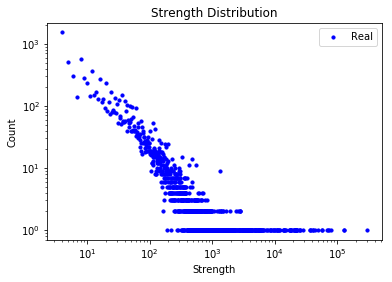

In [6]:
strengths = sorted([value for key, value in computeNodesStrength(G).items()], reverse=True)
strengthCount = collections.Counter(strengths)
srn, cnt = zip(*strengthCount.items())
fig, ax = plt.subplots()
ax.scatter(srn, cnt, s=10, c='b', marker="o", label='Real')
plt.legend(loc='upper right')
plt.title("Strength Distribution")
plt.ylabel("Count")
plt.xlabel("Strength")
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
plt.show()

In [7]:
#get the highest degree node
sorted([(n, d) for n, d in G.degree()], reverse=True, key=lambda tup: tup[1])[0][0]

'worldcup'

In [8]:
#get the highest weight edge
sorted([((u, v),d['weight']) for (u, v, d) in G.edges(data=True)], reverse=True, key=lambda tup: tup[1])[0][0]

('ger', 'mex')

In [9]:
#get the highest strength node
sorted([(n, srn) for n, srn in computeNodesStrength(G).items()], reverse=True, key=lambda tup: tup[1])[0][0]

'worldcup'

In [ ]:
#A-1) Attack based on highest degree centrality

In [35]:
#Remove nodes with Degree Centrality (Highest degree)
G = nx.read_gexf("hashtags.gexf")
ccs = nx.number_connected_components(G) #connected components
sgc = len(sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0].nodes()) #size of giant comp
numberOfCCs = []
sizeOfGC = []
numberOfCCs.append(ccs)
sizeOfGC.append(sgc)
print("initial number of CCs = {}".format(ccs))
print("initial size of GC = {}".format(sgc))

initial number of CCs = 102
initial size of GC = 12366


In [36]:
for rmvCounter in range(20):
    nodeToRemove = sorted([(n, d) for n, d in G.degree()], reverse=True, key=lambda tup: tup[1])[0][0]
    print("** {} **".format(nodeToRemove))
    G.remove_node(nodeToRemove)
    sgc = len(sorted(nx.connected_component_subgraphs(G), 
                     key = len, reverse=True)[0].nodes()) #size of giant comp
    numberOfCCs.append(nx.number_connected_components(G))
    sizeOfGC.append(sgc)

** worldcup **
** rusia2018 **
** worldcup2018 **
** germex **
** mex **
** ger **
** bra **
** football **
** russia2018 **
** germany **
** fathersday **
** mexico **
** sui **
** brasui **
** worldcuprussia2018 **
** copa2018 **
** fifa **
** brazil **
** soccer **
** srb **


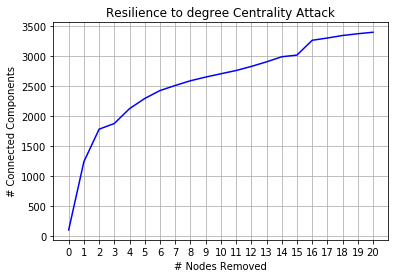

In [37]:
fig, ax = plt.subplots()
ax.plot(numberOfCCs, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to degree Centrality Attack")
plt.ylabel("# Connected Components")
plt.xlabel("# Nodes Removed")
plt.show()

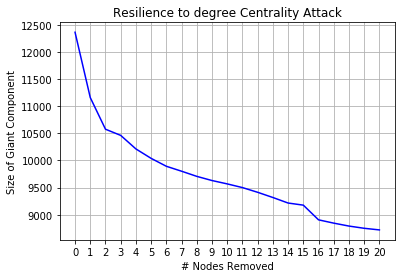

In [38]:
fig, ax = plt.subplots()
ax.plot(sizeOfGC, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to degree Centrality Attack")
plt.ylabel("Size of Giant Component")
plt.xlabel("# Nodes Removed")
plt.show()

In [ ]:
#A-2) Attack based on highest node strength

In [27]:
#Remove nodes with Strength (Highest Strength)
G = nx.read_gexf("hashtags.gexf")
ccs = nx.number_connected_components(G) #connected components
sgc = len(sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0].nodes()) #size of giant comp
numberOfCCs = []
sizeOfGC = []
numberOfCCs.append(ccs)
sizeOfGC.append(sgc)
print("initial number of CCs = {}".format(ccs))
print("initial size of GC = {}".format(sgc))

initial number of CCs = 102
initial size of GC = 12366


In [28]:
for rmvCounter in range(20):
    print(rmvCounter)
    nodeToRemove = sorted([(n, srn) for n, srn in computeNodesStrength(G).items()], reverse=True,
                          key=lambda tup: tup[1])[0][0]
    print("** {} **".format(nodeToRemove))
    G.remove_node(nodeToRemove)
    sgc = len(sorted(nx.connected_component_subgraphs(G), 
                     key = len, reverse=True)[0].nodes()) #size of giant comp
    numberOfCCs.append(nx.number_connected_components(G))
    sizeOfGC.append(sgc)

0
** worldcup **
1
** mex **
2
** rusia2018 **
3
** bra **
4
** germex **
5
** ger **
6
** worldcup2018 **
7
** brasui **
8
** copa2018 **
9
** mexico **
10
** sui **
11
** russia2018 **
12
** crc **
13
** worldcuprussia2018 **
14
** crcsrb **
15
** bitcoin **
16
** football **
17
** fathersday **
18
** fifa **
19
** srb **


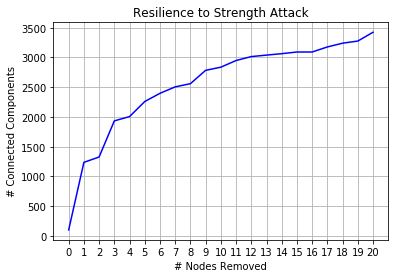

In [29]:
fig, ax = plt.subplots()
ax.plot(numberOfCCs, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Strength Attack")
plt.ylabel("# Connected Components")
plt.xlabel("# Nodes Removed")
plt.show()

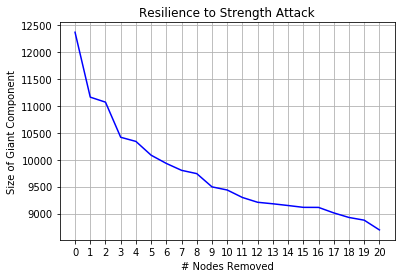

In [30]:
fig, ax = plt.subplots()
ax.plot(sizeOfGC, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Strength Attack")
plt.ylabel("Size of Giant Component")
plt.xlabel("# Nodes Removed")
plt.show()

In [ ]:
#A-3) Attack based on highest betweenness centrality

In [5]:
#Remove edges with Node Betweenness Centrality (Highest Betweenness)
G = nx.read_gexf("hashtags.gexf")
ccs = nx.number_connected_components(G) #connected components
sgc = len(sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0].nodes()) #size of giant comp
numberOfCCs = []
sizeOfGC = []
numberOfCCs.append(ccs)
sizeOfGC.append(sgc)
print("initial number of CCs = {}".format(ccs))
print("initial size of GC = {}".format(sgc))

initial number of CCs = 102
initial size of GC = 12366


In [6]:
for rmvCounter in range(20):
    print(rmvCounter)
    nodeToRemove = sorted([(n, bc) for n, bc in nx.betweenness_centrality(G).items()], reverse=True,
                          key=lambda tup: tup[1])[0][0]
    G.remove_node(nodeToRemove)
    sgc = len(sorted(nx.connected_component_subgraphs(G), 
                     key = len, reverse=True)[0].nodes()) #size of giant comp
    numberOfCCs.append(nx.number_connected_components(G))
    sizeOfGC.append(sgc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


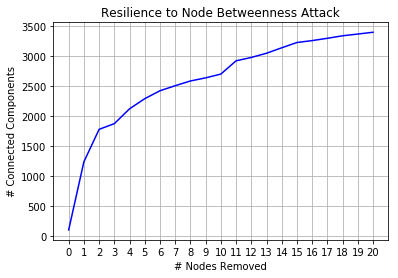

In [9]:
fig, ax = plt.subplots()
ax.plot(numberOfCCs, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Node Betweenness Attack")
plt.ylabel("# Connected Components")
plt.xlabel("# Nodes Removed")
plt.show()

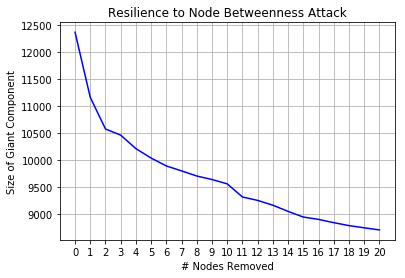

In [10]:
fig, ax = plt.subplots()
ax.plot(sizeOfGC, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Node Betweenness Attack")
plt.ylabel("Size of Giant Component")
plt.xlabel("# Nodes Removed")
plt.show()

In [ ]:
#B-1) Attack based on highest weight

In [73]:
#Remove edges with Weight (Highest Weight)
G = nx.read_gexf("hashtags.gexf")
ccs = nx.number_connected_components(G) #connected components
sgc = len(sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0].nodes()) #size of giant comp
numberOfCCs = []
sizeOfGC = []
numberOfCCs.append(ccs)
sizeOfGC.append(sgc)
print("initial number of CCs = {}".format(ccs))
print("initial size of GC = {}".format(sgc))

initial number of CCs = 102
initial size of GC = 12366


In [74]:
for rmvCounter in range(20):
    edgeToRemove = sorted([((u, v),d['weight']) for (u, v, d) in G.edges(data=True)], 
                          reverse=True, key=lambda tup: tup[1])[0][0]
    G.remove_edge(edgeToRemove[0], edgeToRemove[1])
    print("** {} **".format(edgeToRemove))
    sgc = len(sorted(nx.connected_component_subgraphs(G), 
                     key = len, reverse=True)[0].nodes()) #size of giant comp
    print("{}, {}".format(nx.number_connected_components(G),sgc))
    numberOfCCs.append(nx.number_connected_components(G))
    sizeOfGC.append(sgc)

** ('ger', 'mex') **
102, 12366
** ('worldcup', 'brasui') **
102, 12366
** ('bra', 'worldcup') **
102, 12366
** ('rusia2018', 'mex') **
102, 12366
** ('worldcup', 'worldcuprussia2018') **
102, 12366
** ('rusia2018', 'mexicovsalemania') **
102, 12366
** ('mex', 'mexicovsalemania') **
102, 12366
** ('sui', 'worldcup') **
102, 12366
** ('rusia2018', 'worldcup') **
102, 12366
** ('germex', 'mex') **
102, 12366
** ('worldcup2018', 'worldcup') **
102, 12366
** ('crc', 'srb') **
102, 12366
** ('sui', 'bra') **
102, 12366
** ('sui', 'brasui') **
102, 12366
** ('mex', 'copa2018') **
102, 12366
** ('crc', 'rusia2018') **
102, 12366
** ('worldcup', 'srb') **
102, 12366
** ('nadanosdetiene', 'mex') **
102, 12366
** ('worldcup', 'mexico') **
102, 12366
** ('vaibrasil', 'copa2018') **
102, 12366


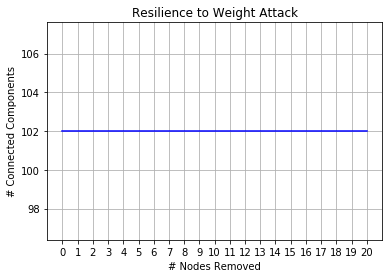

In [33]:
fig, ax = plt.subplots()
ax.plot(numberOfCCs, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Weight Attack")
plt.ylabel("# Connected Components")
plt.xlabel("# Nodes Removed")
plt.show()

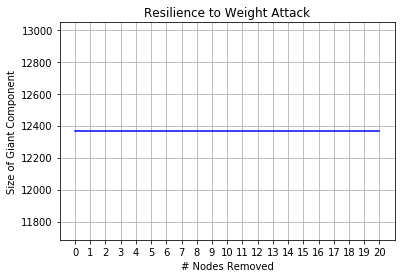

In [34]:
fig, ax = plt.subplots()
ax.plot(sizeOfGC, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Weight Attack")
plt.ylabel("Size of Giant Component")
plt.xlabel("# Nodes Removed")
plt.show()

In [ ]:
#B-2) Attack based on lowest overlap (bridges)

In [16]:
def computeEdgesOverlap(G):
    edgeOverlaps = {}
    for (u, v) in G.edges():
        union1 = set(nx.all_neighbors(G, u)).union(nx.all_neighbors(G, v))
        #print(len(union1))
        intersection1 = set(nx.common_neighbors(G, u, v))
        #print(len(intersection1))
        overlap = len(intersection1) / len(union1)
        #print(overlap)
        edgeOverlaps[(u, v)] = overlap
    return edgeOverlaps

In [17]:
#Remove edges with Overlap measure (Lowest Overlap = bridge)
G = nx.read_gexf("hashtags.gexf")
ccs = nx.number_connected_components(G) #connected components
sgc = len(sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0].nodes()) #size of giant comp
numberOfCCs = []
sizeOfGC = []
numberOfCCs.append(ccs)
sizeOfGC.append(sgc)
print("initial number of CCs = {}".format(ccs))
print("initial size of GC = {}".format(sgc))

initial number of CCs = 102
initial size of GC = 12366


In [18]:
for rmvCounter in range(20):
    print(rmvCounter)
    edgeToRemove = sorted([(e, overlap) for e, overlap in computeEdgesOverlap(G).items()], reverse=False,
                          key=lambda tup: tup[1])[0][0]
    G.remove_edge(edgeToRemove[0], edgeToRemove[1])
    sgc = len(sorted(nx.connected_component_subgraphs(G), 
                     key = len, reverse=True)[0].nodes()) #size of giant comp
    numberOfCCs.append(nx.number_connected_components(G))
    sizeOfGC.append(sgc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


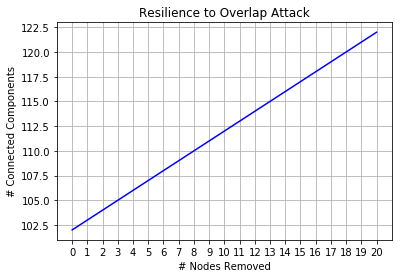

In [47]:
fig, ax = plt.subplots()
ax.plot(numberOfCCs, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Overlap Attack")
plt.ylabel("# Connected Components")
plt.xlabel("# Nodes Removed")
plt.show()

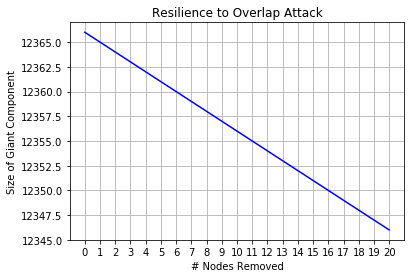

In [25]:
fig, ax = plt.subplots()
ax.plot(sizeOfGC, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Overlap Attack")
plt.ylabel("Size of Giant Component")
plt.xlabel("# Nodes Removed")
plt.show()

In [ ]:
#B-3) Attack based on highest edge betweenness centrality

In [5]:
#Remove edges with Edge Betweenness (Highest)
G = nx.read_gexf("hashtags.gexf")
ccs = nx.number_connected_components(G) #connected components
sgc = len(sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0].nodes()) #size of giant comp
numberOfCCs = []
sizeOfGC = []
numberOfCCs.append(ccs)
sizeOfGC.append(sgc)
print("initial number of CCs = {}".format(ccs))
print("initial size of GC = {}".format(sgc))

initial number of CCs = 102
initial size of GC = 12366


In [6]:
for rmvCounter in range(20):
    print(rmvCounter)
    edgeToRemove = sorted([(e, overlap) for e, overlap in nx.edge_betweenness_centrality(G).items()], reverse=True,
                          key=lambda tup: tup[1])[0][0]
    G.remove_edge(edgeToRemove[0], edgeToRemove[1])
    sgc = len(sorted(nx.connected_component_subgraphs(G), 
                     key = len, reverse=True)[0].nodes()) #size of giant comp
    numberOfCCs.append(nx.number_connected_components(G))
    sizeOfGC.append(sgc)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


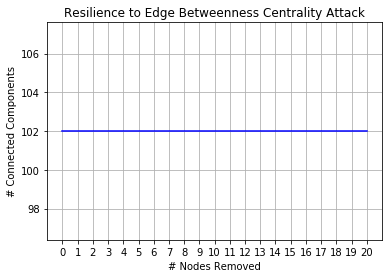

In [28]:
fig, ax = plt.subplots()
ax.plot(numberOfCCs, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Edge Betweenness Centrality Attack")
plt.ylabel("# Connected Components")
plt.xlabel("# Nodes Removed")
plt.show()

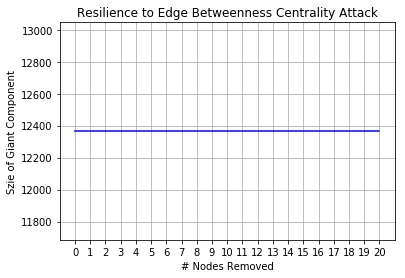

In [27]:
fig, ax = plt.subplots()
ax.plot(sizeOfGC, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Edge Betweenness Centrality Attack")
plt.ylabel("Szie of Giant Component")
plt.xlabel("# Nodes Removed")
plt.show()

In [49]:
'''Testing of Random node removal'''

'Testing of Random node removal'

In [75]:
#Remove nodes Randomly
G = nx.read_gexf("hashtags.gexf")
ccs = nx.number_connected_components(G) #connected components
sgc = len(sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)[0].nodes()) #size of giant comp
numberOfCCs = []
sizeOfGC = []
numberOfCCs.append(ccs)
sizeOfGC.append(sgc)
print("initial number of CCs = {}".format(ccs))
print("initial size of GC = {}".format(sgc))

initial number of CCs = 102
initial size of GC = 12366


In [76]:
#sample by node
nodeList = list(G.nodes)
LableToIntID = {}
for i in range(len(nodeList)):
    LableToIntID[i] = nodeList[i]

In [77]:
import random
for rmvCounter in range(20):
    print(rmvCounter)
    nodeToRemove = LableToIntID[random.randint(0, len(G.nodes()))]
    print("** {} **".format(nodeToRemove))
    G.remove_node(nodeToRemove)
    sgc = len(sorted(nx.connected_component_subgraphs(G), 
                     key = len, reverse=True)[0].nodes()) #size of giant comp
    numberOfCCs.append(nx.number_connected_components(G))
    sizeOfGC.append(sgc)

0
** rndeportesinforma **
1
** rainbowrussians **
2
** worldsenbutsuth **
3
** goldkicker **
4
** volcano **
5
** 420 **
6
** tronisti **
7
** trivets **
8
** eight **
9
** moving **
10
** betstars **
11
** راديو **
12
** terrorist **
13
** semaaydemir **
14
** recipes **
15
** bk8 **
16
** 15disparuscesdakebe **
17
** sixtimes **
18
** firstfathersday **
19
** smitetheworld **


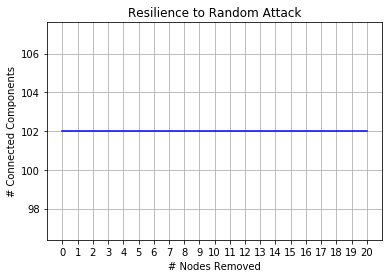

In [78]:
fig, ax = plt.subplots()
ax.plot(numberOfCCs, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Random Attack")
plt.ylabel("# Connected Components")
plt.xlabel("# Nodes Removed")
plt.show()

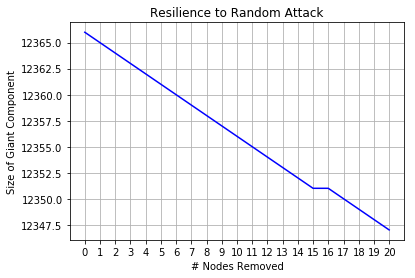

In [79]:
fig, ax = plt.subplots()
ax.plot(sizeOfGC, 'b-', label='Real')
ax.set_xticks(range(21))
plt.grid(True)
plt.title("Resilience to Random Attack")
plt.ylabel("Size of Giant Component")
plt.xlabel("# Nodes Removed")
plt.show()